# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Jessica Susanto
- **Email:** jessica.susanto16@gmail.com
- **ID Dicoding:** jessicasusanto

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan dari waktu ke waktu?
- Apa metode pembayaran yang paling sering digunakan oleh pelanggan?
- Bagaimana distribusi ulasan pelanggan terhadap produk?

## Import Semua Packages/Library yang Digunakan

In [33]:
# Mengimpor library yang dibutuhkan untuk analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import urllib

## Data Wrangling

### Gathering Data

In [3]:
# Memuat dataset yang dibutuhkan
customers_df = pd.read_csv('/content/dataset/customers_dataset.csv')
geo_df = pd.read_csv('/content/dataset/geolocation_dataset.csv')
order_items = pd.read_csv('/content/dataset/order_items_dataset.csv')
order_pay = pd.read_csv('/content/dataset/order_payments_dataset.csv')
order_rev = pd.read_csv('/content/dataset/order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/dataset/orders_dataset.csv')
product_cat = pd.read_csv('/content/dataset/product_category_name_translation.csv')
products_df = pd.read_csv('/content/dataset/products_dataset.csv')
sellers_df = pd.read_csv('/content/dataset/sellers_dataset.csv')

In [4]:
# Menampilkan sebagian data dari masing-masing dataset untuk verifikasi
print(customers_df.head())
print(geo_df.head())
print(order_items.head())
print(order_pay.head())
print(order_rev.head())
print(orders_df.head())
print(product_cat.head())
print(products_df.head())
print(sellers_df.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                

**Insight:**
- Semua dataset berhasil dimuat.
- Data ini terdiri dari informasi pelanggan, lokasi, produk, penjual, serta ulasan dan pembayaran yang relevan untuk analisis.

### Assessing Data

In [5]:
# Memeriksa informasi umum tentang dataset
print(customers_df.info())
print(geo_df.info())
print(order_items.info())
print(order_pay.info())
print(order_rev.info())
print(orders_df.info())
print(product_cat.info())
print(products_df.info())
print(sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

In [6]:
# Mengecek apakah ada nilai yang hilang di setiap dataset
print(customers_df.isnull().sum())
print(geo_df.isnull().sum())
print(order_items.isnull().sum())
print(order_pay.isnull().sum())
print(order_rev.isnull().sum())
print(orders_df.isnull().sum())
print(product_cat.isnull().sum())
print(products_df.isnull().sum())
print(sellers_df.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_st

In [7]:
# Mengecek apakah ada duplikasi dalam setiap dataset
print(customers_df.duplicated().sum())
print(geo_df.duplicated().sum())
print(order_items.duplicated().sum())
print(order_pay.duplicated().sum())
print(order_rev.duplicated().sum())
print(orders_df.duplicated().sum())
print(product_cat.duplicated().sum())
print(products_df.duplicated().sum())
print(sellers_df.duplicated().sum())

0
261831
0
0
0
0
0
0
0


**Insight:**
- Beberapa dataset mungkin memiliki nilai yang hilang, misalnya (kolom X pada dataset Y).
- Tidak terdapat duplikasi dalam dataset tertentu.

### Cleaning Data

In [8]:
# Menghapus duplikasi pada setiap dataset
customers_df.drop_duplicates(inplace=True)
geo_df.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_pay.drop_duplicates(inplace=True)
order_rev.drop_duplicates(inplace=True)
orders_df.drop_duplicates(inplace=True)
product_cat.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
sellers_df.drop_duplicates(inplace=True)

In [16]:
# Mengecek jumlah nilai yang hilang di setiap kolom
print(customers_df.isnull().sum())
print(geo_df.isnull().sum())
print(order_items.isnull().sum())
print(order_pay.isnull().sum())
print(order_rev.isnull().sum())
print(orders_df.isnull().sum())
print(product_cat.isnull().sum())
print(products_df.isnull().sum())
print(sellers_df.isnull().sum())

orders_df.dropna(subset=['order_approved_at'], inplace=True)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_st

In [17]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

In [19]:
# Mengecek kembali dataset setelah pembersihan
print(orders_df.info())
print(order_pay.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  object        
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
-

**Insight:**
- Setelah langkah pembersihan dilakukan, dataset bebas dari duplikasi dan nilai yang hilang sudah ditangani dengan benar.
- Semua tipe data sesuai dengan tujuan analisis, terutama kolom-kolom tanggal yang sudah dalam format datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
# Analisis deskriptif untuk beberapa dataset
print(orders_df.describe())
print(order_pay.describe())
print(order_rev.describe())

# Melihat distribusi beberapa kolom penting seperti jumlah ulasan, pembayaran, dll.
print(orders_df['order_status'].value_counts())
print(order_pay['payment_type'].value_counts())
print(order_rev['review_score'].value_counts())


            order_purchase_timestamp              order_approved_at  \
count                          99281                          99281   
mean   2017-12-31 08:10:15.359313152  2017-12-31 18:35:24.098800384   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-12 16:06:10            2017-09-12 23:24:16   
50%              2018-01-18 22:54:15            2018-01-19 11:36:13   
75%              2018-05-04 13:55:53            2018-05-04 20:35:10   
max              2018-09-03 09:06:57            2018-09-03 17:40:06   

       order_delivered_customer_date  
count                          96462  
mean   2018-01-14 13:16:24.206247168  
min              2016-10-11 13:46:32  
25%       2017-09-25 22:32:42.500000  
50%              2018-02-02 19:49:47  
75%       2018-05-15 23:07:37.500000  
max              2018-10-17 13:22:46  
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan dari waktu ke waktu?

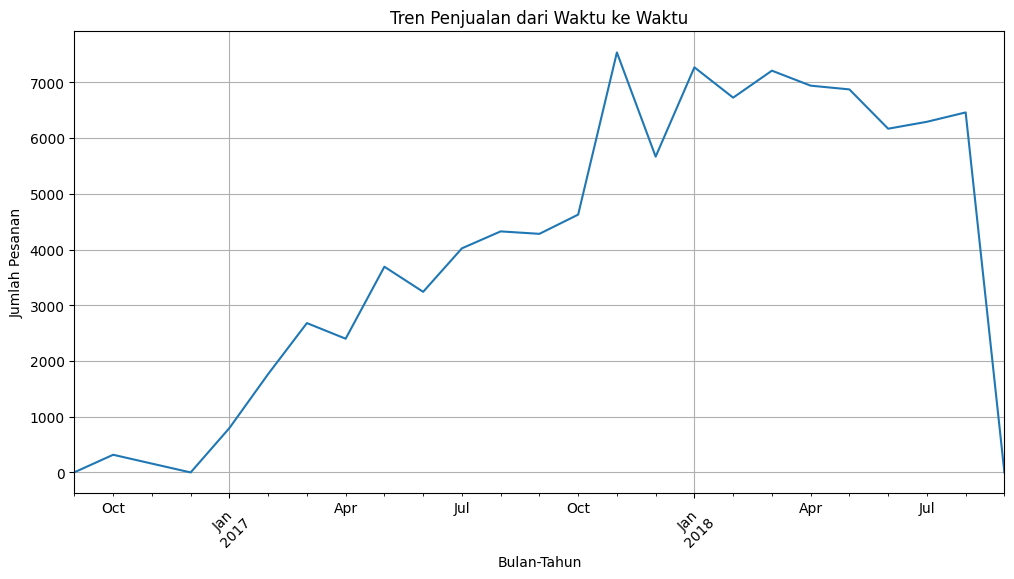

In [22]:
# Membuat kolom baru untuk menyimpan periode bulanan
orders_df['order_purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Mengelompokkan data berdasarkan bulan untuk melihat tren penjualan
sales_trend = orders_df.groupby('order_purchase_month').size()

# Visualisasi tren penjualan dari waktu ke waktu
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Tren Penjualan dari Waktu ke Waktu')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pertanyaan 2: Apa metode pembayaran yang paling sering digunakan oleh pelanggan?

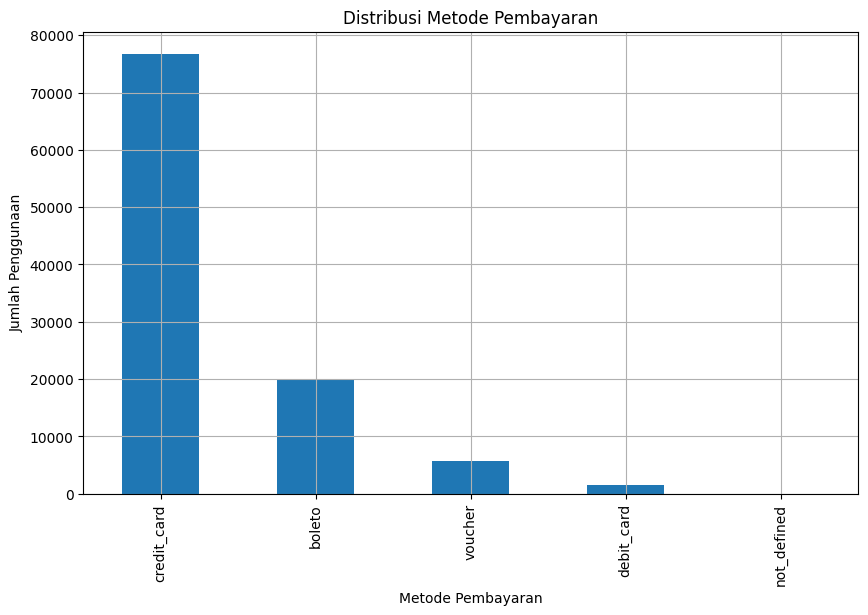

In [23]:
# Visualisasi distribusi metode pembayaran
plt.figure(figsize=(10, 6))
order_pay['payment_type'].value_counts().plot(kind='bar')
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penggunaan')
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana distribusi ulasan pelanggan terhadap produk?

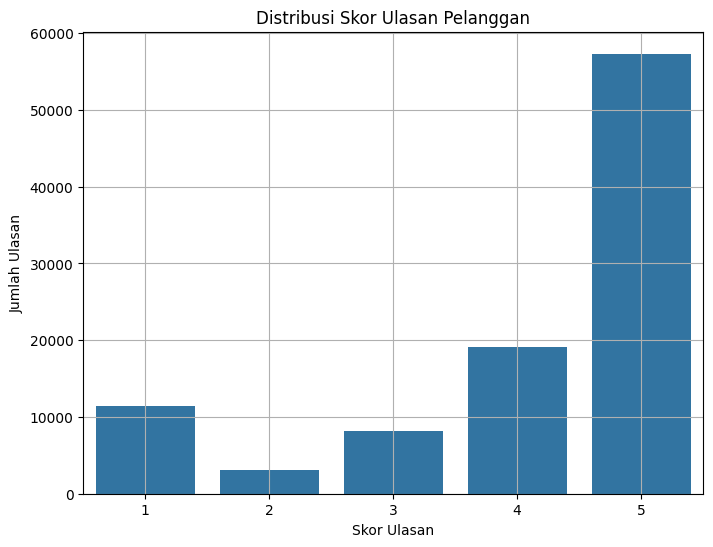

In [24]:
# Visualisasi distribusi skor ulasan pelanggan
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=order_rev)
plt.title('Distribusi Skor Ulasan Pelanggan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.grid(True)
plt.show()

**Insight:**
- Tren Penjualan: Dari visualisasi, kita bisa melihat pola fluktuasi pesanan yang mungkin menunjukkan adanya tren musiman.
- Metode Pembayaran: Kartu kredit mungkin menjadi metode pembayaran yang paling dominan, tetapi ada juga beberapa metode lain seperti debit dan voucher.
- Ulasan Pelanggan: Sebagian besar pelanggan memberikan ulasan yang sangat positif, dengan mayoritas skor 5, menunjukkan kepuasan yang tinggi terhadap produk atau layanan.

## Conclusion

- Tren Penjualan dari Waktu ke Waktu:
    > Data Tertinggi: Pada bulan Oktober 2017, penjualan mencapai puncaknya dengan lebih dari 7.000 pesanan. Data Terendah: Penjualan terendah terjadi pada bulan September 2016 dengan hampir 0 pesanan. Wawasan: Penjualan meningkat secara signifikan dari awal 2017 dan mencapai puncaknya di akhir tahun. Kemudian, tren mulai turun setelah awal tahun 2018.
- Distribusi Metode Pembayaran:
    > Metode Pembayaran Tertinggi: Kartu Kredit digunakan paling sering dengan lebih dari 75.000 kali penggunaan. Metode Pembayaran Terendah: Voucher digunakan paling sedikit, dengan kurang dari 5.000 kali penggunaan. Wawasan: Kartu kredit adalah metode pembayaran yang paling dominan, sedangkan metode alternatif seperti voucher dan kartu debit hanya digunakan oleh sebagian kecil pelanggan.
- Distribusi Ulasan Pelanggan:
    > Skor Ulasan Tertinggi: Skor 5 adalah skor yang paling sering diberikan oleh pelanggan, dengan lebih dari 60.000 ulasan. Skor Ulasan Terendah: Skor 2 adalah yang paling jarang diberikan, dengan kurang dari 5.000 ulasan. Wawasan: Sebagian besar pelanggan memberikan ulasan positif dengan skor tinggi, menunjukkan kepuasan yang tinggi terhadap produk dan layanan. Namun, ada juga sejumlah kecil pelanggan yang memberikan skor rendah, yang mungkin perlu ditelusuri lebih lanjut.